In [10]:
import requests as rq
import json

In [6]:
overpass_endpoint = "https://overpass-api.de/api/interpreter"
query = """
[out:json];
node(52.04700094984326,4.231452941894531, 52.10207675702276,4.366722106933594)["amenity"="restaurant"];
out;"""
data = {
    "data": query
}

In [7]:
response = rq.post(overpass_endpoint, data=data)

In [8]:
jsn = response.json()

In [9]:
jsn

{'version': 0.6,
 'generator': 'Overpass API 0.7.57 93a4d346',
 'osm3s': {'timestamp_osm_base': '2021-10-31T13:48:13Z',
  'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
 'elements': [{'type': 'node',
   'id': 27298196,
   'lat': 52.0784108,
   'lon': 4.2928326,
   'tags': {'amenity': 'restaurant',
    'diet:vegan': 'yes',
    'diet:vegetarian': 'only',
    'name': 'Eetcafé Hagedis',
    'opening_hours': 'Th-Su 17:00-21:00',
    'organic': 'only',
    'website': 'https://www.restauranthagedis.nl/en/',
    'wheelchair': 'limited'}},
  {'type': 'node',
   'id': 318671317,
   'lat': 52.0481865,
   'lon': 4.3251834,
   'tags': {'amenity': 'restaurant',
    'cuisine': 'italian',
    'name': 'Casanova'}},
  {'type': 'node',
   'id': 439293438,
   'lat': 52.0949235,
   'lon': 4.265475,
   'tags': {'addr:city': "'s-Gravenhage",
    'addr:country': 'NL',
    'addr:housenumber': '29',
    'addr:postcode': '2583CL',
    'ad

In [15]:
for_csv = [ f"{el['lat']},{el['lon']}" for el in jsn["elements"] ]
for_csv = "\n".join(for_csv)
with open("den_haag_horeca.csv", "w") as outfile:
    outfile.write("lat,lon\n")
    outfile.write(for_csv)

In [2]:
import osmnx as ox
place = "'S Gravenhage', Zuid Holland"
tags = {"boundary": "administrative"}
ox.geometries_from_place(place, tags)

/Users/piotrzakrzewski/code/overpass/.env/lib/python3.8/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/Users/piotrzakrzewski/code/overpass/.env/lib/python3.8/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


alt_name alt_name:ja  \
element_type osmid                                  
way          36822683             NaN         NaN   
             36822685             NaN         NaN   
             36822692             NaN         NaN   
             38761746             NaN         NaN   
             38761779             NaN         NaN   
             38761786             NaN         NaN   
             38761857             NaN         NaN   
             38761860             NaN         NaN   
             38761867             NaN         NaN   
             43866100             NaN         NaN   
             43866102             NaN         NaN   
             43867509             NaN         NaN   
             43867510             NaN         NaN   
             51819049             NaN         NaN   
             51849658             NaN         NaN   
             51852052             NaN         NaN   
             93676088             NaN         NaN   
             93676094             NaN         NaN   
             93676840             NaN         NaN   
             93676841             NaN         NaN   
             93676842             NaN         NaN   
             93676843             NaN         NaN   
             93676844             NaN         NaN   
             93676845             NaN         NaN   
             93727764             NaN         NaN   
             207932778            NaN         NaN   
             208074566            NaN         NaN   
             568778298            NaN         NaN   
             682927832            NaN         NaN   
             876303444            NaN         NaN   
             876303445            NaN         NaN   
relation     47772                NaN      南オランダ州   
             162255               NaN         NaN   
             162256               NaN         NaN   
             162257               NaN         NaN   
             192736               NaN         NaN   
             192737     's-Gravenhage         NaN   
             271202               NaN         NaN   
             295090               NaN         NaN   
             295091               NaN         NaN   
             295263               NaN         NaN   
             311979               NaN         NaN   
             324269               NaN         NaN   
             324389               NaN         NaN   
             444099               NaN         NaN   
             444355               NaN         NaN   
             444432               NaN         NaN   
             1360664              NaN         NaN   
             1360666              NaN         NaN   
             1360683              NaN         NaN   
             1360684              NaN         NaN   
             1361422              NaN         NaN   
             11931566             NaN         NaN   
             11948219             NaN         NaN   

                                           alt_name:la  \
element_type osmid                                       
way          36822683                              NaN   
             36822685                              NaN   
             36822692                              NaN   
             38761746                              NaN   
             38761779                              NaN   
             38761786                              NaN   
             38761857                              NaN   
             38761860                              NaN   
             38761867                              NaN   
             43866100                              NaN   
             43866102                              NaN   
             43867509                              NaN   
             43867510                              NaN   
             51819049                              NaN   
             51849658                              NaN   
             51852052                              NaN   
             936

In [3]:
df = _


In [12]:
den_haag_borders = df[df["name:nl"] == "Den Haag"]["geometry"]

In [16]:
den_haag_borders

element_type  osmid 
relation      192736    POLYGON ((4.18500 52.06145, 4.19123 52.06625, ...
              192737    POLYGON ((4.18500 52.06145, 4.19123 52.06625, ...
Name: geometry, dtype: geometry

In [17]:
den_haag_borders = den_haag_borders[0]

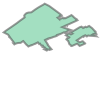

In [18]:
den_haag_borders


In [19]:
import geopandas as gpd
import pandas as pd
import h3pandas
from shapely.geometry import Polygon

In [27]:
gdf = gpd.GeoDataFrame({"geometry": den_haag_borders, "name": ["The Hague"]}) 

In [28]:
gdf

,geometry,name
0,"POLYGON ((4.18500 52.06145, 4.19123 52.06625, ...",The Hague


In [45]:
polyfilled = gdf.h3.polyfill(9)

In [46]:
hexes = polyfilled["h3_polyfill"]

In [47]:
import random

In [48]:
def to_kepler_csv(gdf, name="for_h3.csv"):
    hexes = gdf["h3_polyfill"].to_list()[0]
    filler = [random.randint(0, 100) for x in range(len(hexes))]
    df = pd.DataFrame({"hex": hexes, "value":filler })
    df.to_csv(name, index=False)

In [49]:
to_kepler_csv(polyfilled)